In [1]:
DATA_DIR = '/Users/everettwetchler/src/research/zaki/github/analysis/data/2019–2020/'
PLOT_DIR = paste(DATA_DIR, 'plots/', sep="")

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-and-clean-prefrosh-data" data-toc-modified-id="Load-and-clean-prefrosh-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and clean prefrosh data</a></span><ul class="toc-item"><li><span><a href="#Check-for-incomplete-data" data-toc-modified-id="Check-for-incomplete-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Check for incomplete data</a></span></li><li><span><a href="#Check-that-all-Ps-are-over-18" data-toc-modified-id="Check-that-all-Ps-are-over-18-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Check that all Ps are over 18</a></span></li><li><span><a href="#Check-for-duplicates-(people-who-did-the-survey-more-than-once)" data-toc-modified-id="Check-for-duplicates-(people-who-did-the-survey-more-than-once)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Check for duplicates (people who did the survey more than once)</a></span></li><li><span><a href="#Slim-down-our-dataframe-by-removing-columns-we-don't-need" data-toc-modified-id="Slim-down-our-dataframe-by-removing-columns-we-don't-need-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Slim down our dataframe by removing columns we don't need</a></span></li><li><span><a href="#Compute-scale-scores" data-toc-modified-id="Compute-scale-scores-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Compute scale scores</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Race" data-toc-modified-id="Race-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Race</a></span></li></ul></li><li><span><a href="#Load-and-clean-network-trait-data" data-toc-modified-id="Load-and-clean-network-trait-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load and clean network trait data</a></span><ul class="toc-item"><li><span><a href="#Check-for-duplicates" data-toc-modified-id="Check-for-duplicates-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Check for duplicates</a></span></li><li><span><a href="#Compute-scales" data-toc-modified-id="Compute-scales-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Compute scales</a></span></li><li><span><a href="#Drop-columns-we-don't-need" data-toc-modified-id="Drop-columns-we-don't-need-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Drop columns we don't need</a></span></li><li><span><a href="#Peek-at-frequency-of-missing-values" data-toc-modified-id="Peek-at-frequency-of-missing-values-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Peek at frequency of missing values</a></span></li><li><span><a href="#International-Students" data-toc-modified-id="International-Students-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>International Students</a></span></li><li><span><a href="#Parental-Education" data-toc-modified-id="Parental-Education-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Parental Education</a></span></li><li><span><a href="#Family-Income" data-toc-modified-id="Family-Income-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Family Income</a></span></li></ul></li><li><span><a href="#Merge-prefrosh-and-network-data" data-toc-modified-id="Merge-prefrosh-and-network-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Merge prefrosh and network data</a></span></li><li><span><a href="#Create-composite-well-being-columns" data-toc-modified-id="Create-composite-well-being-columns-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create composite well-being columns</a></span></li><li><span><a href="#Load-nominations-and-compute-network-in/out-degree-for-each-P-and-each-network" data-toc-modified-id="Load-nominations-and-compute-network-in/out-degree-for-each-P-and-each-network-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load nominations and compute network in/out degree for each P and each network</a></span><ul class="toc-item"><li><span><a href="#Sanity-check-for-missing-values---we-aren't-using-the-DID-(dorm)-column-so-that's-fine" data-toc-modified-id="Sanity-check-for-missing-values---we-aren't-using-the-DID-(dorm)-column-so-that's-fine-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Sanity check for missing values - we aren't using the DID (dorm) column so that's fine</a></span></li><li><span><a href="#Make-a-function-to-compute-in/out-degrees-for-any-given-set-of-nominations" data-toc-modified-id="Make-a-function-to-compute-in/out-degrees-for-any-given-set-of-nominations-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Make a function to compute in/out degrees for any given set of nominations</a></span></li><li><span><a href="#Compute-the-union-network" data-toc-modified-id="Compute-the-union-network-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Compute the union network</a></span><ul class="toc-item"><li><span><a href="#Spot-check-the-first-P" data-toc-modified-id="Spot-check-the-first-P-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Spot check the first P</a></span></li></ul></li><li><span><a href="#Compute-the-'intimate'-network-(close-friends-and-bad-news)" data-toc-modified-id="Compute-the-'intimate'-network-(close-friends-and-bad-news)-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Compute the 'intimate' network (close friends and bad news)</a></span><ul class="toc-item"><li><span><a href="#Spot-check-the-first-P" data-toc-modified-id="Spot-check-the-first-P-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Spot check the first P</a></span></li></ul></li><li><span><a href="#Compute-all-other-networks-individually,-in-case-we-want-to-use-them-in-a-subsequent-analysis" data-toc-modified-id="Compute-all-other-networks-individually,-in-case-we-want-to-use-them-in-a-subsequent-analysis-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Compute all other networks individually, in case we want to use them in a subsequent analysis</a></span></li><li><span><a href="#A-look-at-in-and-out-degree-distributions,-to-be-sure-they-seem-sane" data-toc-modified-id="A-look-at-in-and-out-degree-distributions,-to-be-sure-they-seem-sane-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>A look at in and out degree distributions, to be sure they seem sane</a></span></li></ul></li><li><span><a href="#Train-test-split-and-write" data-toc-modified-id="Train-test-split-and-write-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train-test split and write</a></span></li></ul></div>

## Imports

In [2]:
library(funModeling)  # Data exploration utilities
library(Hmisc)        # Data exploration utilities
library(lme4)         # Random-effects modelling
library(mice)         # Data imputation
library(tidyverse)    # Data wrangling

# Display more data in the Jupyter notebook
options(repr.matrix.max.cols=100, repr.matrix.max.rows=100)

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


funModeling v.1.9.3 :)
Examples and tutorials at livebook.datascienceheroes.com
 / Now in Spanish: librovivodecienciadedatos.ai

Loading required package: Matrix


Attaching package: ‘mice’


The following objects are masked from ‘package:base’:

    cbind, rbind


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::complete()  masks mice::complete()
✖ tidyr::expand()    masks Matrix::expand()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks

## Load and clean prefrosh data

In [3]:
prefrosh = read.csv(paste(DATA_DIR, 'Prefrosh_Survey/df_prefroshCleanData.csv', sep=""), na.strings=c("", " ", "NA"))
prefrosh = prefrosh[, -1]  # Drop first column (a meaningless row number)
str(prefrosh)
head(prefrosh)

'data.frame':	1102 obs. of  59 variables:
 $ PID                  : int  4507 2903 1637 1923 7189 1236 4954 3942 2608 2326 ...
 $ Progress             : int  100 100 100 100 100 100 100 100 100 100 ...
 $ Duration..in.seconds.: int  358 208 452 1087 290 310 526 335 503 967 ...
 $ Finished             : Factor w/ 2 levels "False","True": 2 2 2 2 2 2 2 2 2 2 ...
 $ RecordedDate         : Factor w/ 1095 levels "2019-08-25 22:34:28",..: 8 1034 740 437 865 1055 294 68 581 592 ...
 $ age18                : Factor w/ 1 level "Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ lifeSatisfaction_1   : int  7 7 7 6 2 6 7 3 6 6 ...
 $ lifeSatisfaction_2   : int  1 7 6 7 4 4 6 3 6 6 ...
 $ lifeSatisfaction_3   : int  1 7 6 7 3 5 6 3 6 3 ...
 $ lifeSatisfaction_4   : int  2 7 7 7 5 6 7 4 7 6 ...
 $ lifeSatisfaction_5   : int  1 7 6 7 3 5 6 4 6 6 ...
 $ lifeSatisfaction_6   : int  1 2 2 1 5 5 2 5 1 2 ...
 $ Empathy_1            : int  6 5 7 6 7 5 6 6 7 6 ...
 $ Empathy_2            : int  6 6 7 7 7 6 6 6 7 6 ...
 $ Em

,PID,Progress,Duration..in.seconds.,Finished,RecordedDate,age18,lifeSatisfaction_1,lifeSatisfaction_2,lifeSatisfaction_3,lifeSatisfaction_4,lifeSatisfaction_5,lifeSatisfaction_6,Empathy_1,Empathy_2,Empathy_3,Empathy_4,Empathy_5,Empathy_6,Empathy_7,Empathy_8,Sociality_1,Sociality_2,NeedToBelong_1,NeedToBelong_2,NeedToBelong_3,NeedToBelong_4,LayEmpathy_1,LayEmpathy_2,LayEmpathy_3,TIPI_1,TIPI_2,TIPI_3,TIPI_4,TIPI_5,TIPI_6,TIPI_7,TIPI_8,TIPI_9,TIPI_10,loneliness_1,loneliness_2,loneliness_3,Stress_1,Stress_2,poliIdeology_1,poliIdeology_2,poliIdeology_3,politicalIssues_1,politicalIssues_2,ladderUS,gender,gender_3_TEXT,race,race_9_TEXT,major,dorm,lifeSatisfaction_6R,NeedToBelong_2R,LayEmpathy_3R
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>
1,4507,100,358,True,2019-09-03 09:35:54,Yes,7,1,1,2,1,1,6,6,6,6,6,7,6,6,6,5,7,1,7,7,1,2,5,5,6,6,3,6,2,7,6,3,1,3,1,1,2,2,2,2,1,7,7,3,Male,NA,Black or African American,NA,Management Science and Engineering,Eucalipto,7,7,3
2,2903,100,208,True,2019-09-16 13:41:44,Yes,7,7,7,7,7,2,5,6,4,6,6,5,5,7,7,7,3,7,7,5,3,6,2,6,3,7,2,7,2,5,5,6,2,1,2,1,3,2,2,1,4,7,7,8,Female,NA,"White or Caucasian,Hispanic or Latino/a",NA,Economics,Larkin,6,1,6
3,1637,100,452,True,2019-09-06 13:26:16,Yes,7,6,6,7,6,2,7,7,6,7,7,7,7,7,6,5,3,6,3,4,5,3,5,5,2,6,3,6,6,7,1,7,2,3,2,1,2,2,4,3,5,6,6,9,Male,NA,"East Asian,White or Caucasian",NA,Economics,Norcliffe,6,2,3
4,1923,100,1087,True,2019-09-03 18:12:17,Yes,6,7,7,7,7,1,6,7,6,6,5,5,3,6,5,5,2,6,5,7,1,1,7,6,4,5,2,7,4,5,3,6,3,2,1,1,2,1,4,3,4,5,5,8,Male,NA,East Asian,NA,Symbolic Systems,Larkin,7,2,1
5,7189,100,290,True,2019-09-09 18:54:16,Yes,2,4,3,5,3,5,7,7,6,5,7,7,3,7,7,1,2,6,2,2,3,3,5,3,6,7,5,6,3,5,2,5,3,2,2,2,3,3,1,1,1,7,7,6,Female,NA,Middle Eastern,NA,Human Biology,Alondra,3,2,3
6,1236,100,310,True,2019-09-16 17:57:11,Yes,6,4,5,6,5,5,5,6,5,6,5,5,6,5,3,5,5,3,7,7,2,2,6,3,3,5,5,4,5,5,3,5,3,2,2,2,2,2,3,4,3,6,5,7,Male,NA,East Asian,NA,Chemical Engineering,Larkin,3,5,2


### Check for incomplete data

In [4]:
summary(prefrosh$Finished)

False  True 
    1  1101

In [5]:
paste("Dropping", sum(prefrosh$Finished == "False"), "incomplete surveys")
prefrosh = prefrosh[prefrosh$Finished == "True",]

[1] "Dropping 1 incomplete surveys"

In [6]:
summary(prefrosh$Finished)

False  True 
    0  1101

### Check that all Ps are over 18

In [7]:
summary(prefrosh$age18)

Yes 
1101

In [8]:
summary(prefrosh$family_income)

Length  Class   Mode 
     0   NULL   NULL 

### Check for duplicates (people who did the survey more than once)

In [9]:
prefrosh = arrange(prefrosh, PID, RecordedDate)

In [10]:
prefrosh[duplicated(prefrosh$PID) | duplicated(prefrosh$PID, fromLast=TRUE),]

,PID,Progress,Duration..in.seconds.,Finished,RecordedDate,age18,lifeSatisfaction_1,lifeSatisfaction_2,lifeSatisfaction_3,lifeSatisfaction_4,lifeSatisfaction_5,lifeSatisfaction_6,Empathy_1,Empathy_2,Empathy_3,Empathy_4,Empathy_5,Empathy_6,Empathy_7,Empathy_8,Sociality_1,Sociality_2,NeedToBelong_1,NeedToBelong_2,NeedToBelong_3,NeedToBelong_4,LayEmpathy_1,LayEmpathy_2,LayEmpathy_3,TIPI_1,TIPI_2,TIPI_3,TIPI_4,TIPI_5,TIPI_6,TIPI_7,TIPI_8,TIPI_9,TIPI_10,loneliness_1,loneliness_2,loneliness_3,Stress_1,Stress_2,poliIdeology_1,poliIdeology_2,poliIdeology_3,politicalIssues_1,politicalIssues_2,ladderUS,gender,gender_3_TEXT,race,race_9_TEXT,major,dorm,lifeSatisfaction_6R,NeedToBelong_2R,LayEmpathy_3R
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>
43,1352,100,257,True,2019-09-04 00:55:03,Yes,5,5,4,4,5,5,6,6,6,6,6,7,7,6,7,6,6,3,7,7,3,4,6,7,6,7,4,6,2,5,2,4,2,2,3,2,2,1,2,1,3,6,5,6,Male,NA,"Native American,White or Caucasian,Hispanic or Latino/a",NA,Public Policy,Sally Ride,3,5,2
44,1352,100,197,True,2019-09-10 10:35:38,Yes,6,6,6,5,6,5,6,7,5,5,6,6,6,6,7,6,7,3,7,7,3,2,6,7,5,6,3,6,2,5,2,3,2,2,2,2,2,1,3,2,3,7,3,6,Male,NA,"Native American,White or Caucasian,Hispanic or Latino/a",NA,Public Policy,Sally Ride,3,5,2
153,2078,100,243,True,2019-09-09 17:31:42,Yes,6,6,5,6,6,5,6,6,5,6,5,6,6,5,5,4,5,3,6,6,3,2,5,5,4,5,4,5,4,5,3,5,4,2,2,2,2,1,4,3,4,6,6,6,Male,NA,East Asian,NA,undecided,Granada,3,5,3
154,2078,100,147,True,2019-09-09 17:34:53,Yes,6,6,5,6,6,5,6,6,6,5,6,6,6,5,5,4,5,3,5,5,2,2,5,5,4,5,4,5,4,5,3,5,3,2,2,2,2,1,4,3,4,6,6,7,Male,NA,East Asian,NA,undecided,Granada,3,5,3
161,2125,100,581,True,2019-09-09 18:49:14,Yes,7,7,7,7,6,3,7,7,5,5,7,6,6,7,5,1,4,6,6,6,4,3,5,7,5,7,3,5,6,5,1,5,2,2,3,2,2,2,4,6,3,5,4,7,Male,NA,Middle Eastern,NA,Energy Recourses Engineering,Roble,5,2,3
162,2125,100,294,True,2019-09-09 19:23:05,Yes,7,6,7,7,6,2,6,7,5,3,7,7,5,6,6,2,5,6,5,4,4,4,5,6,5,7,2,6,5,7,1,6,2,2,3,2,2,2,4,6,2,5,4,7,Male,NA,Middle Eastern,NA,Energy Resources Engineering,Roble,6,2,3
384,3643,100,277,True,2019-09-09 15:43:21,Yes,4,5,4,6,4,5,6,6,6,5,5,5,6,5,5,5,5,5,5,5,3,3,5,4,4,6,4,5,5,5,4,4,3,2,2,2,2,2,3,3,5,3,6,5,Female,NA,East Asian,NA,Undecided,Larkin,3,3,3
385,3643,100,213,True,2019-09-09 15:56:59,Yes,5,5,5,6,5,5,6,6,6,5,5,5,5,5,5,5,5,4,5,5,3,3,5,3,4,5,4,5,5,5,4,4,3,2,2,2,2,2,3,3,5,3,6,5,Female,NA,East Asian,NA,Undecided,Larkin,3,4,3
431,3970,100,293,True,2019-09-03 12:41:23,Yes,6,6,6,6,6,2,6,6,6,6,6,6,6,6,5,4,3,6,5,5,2,2,5,6,2,6,2,6,3,6,2,6,2,1,2,1,2,1,4,3,5,5,5,7,Male,NA,Hispanic or Latino/a,NA,Computer Science/Biomedical Computation,Cedro,6,2,3


In [11]:
n = nrow(prefrosh)
ndup = n - length(unique(prefrosh$PID))
print(paste("Removing ", ndup, " (of ", n, ") surveys from people who had already completed the survey once"), sep=" ")
prefrosh = prefrosh[!duplicated(prefrosh$PID),]
print(paste(nrow(prefrosh), "remain"))

[1] "Removing  10  (of  1101 ) surveys from people who had already completed the survey once"
[1] "1091 remain"


### Slim down our dataframe by removing columns we don't need

In [12]:
cols_to_drop = c("age18", "Finished", "Progress", "Duration..in.seconds.", "RecordedDate",
                 'ladderUS', 'gender_3_TEXT', 'race_9_TEXT', 'major', 'lifeSatisfaction_6')

for (prefix in c('LayEmpathy', 'Sociality', 'NeedToBelong', 'poliIdeology', 'politicalIssues')){
    for (col in colnames(prefrosh)) {
        if (startsWith(col, prefix)) {
            cols_to_drop = c(cols_to_drop, col)
        }
    }
}
print(paste("Dropping", length(cols_to_drop), "columns we don't need"))
cols_to_drop
prefrosh = prefrosh %>% select(-cols_to_drop)
head(prefrosh)

[1] "Dropping 26 columns we don't need"


[1] "age18"                 "Finished"              "Progress"             
 [4] "Duration..in.seconds." "RecordedDate"          "ladderUS"             
 [7] "gender_3_TEXT"         "race_9_TEXT"           "major"                
[10] "lifeSatisfaction_6"    "LayEmpathy_1"          "LayEmpathy_2"         
[13] "LayEmpathy_3"          "LayEmpathy_3R"         "Sociality_1"          
[16] "Sociality_2"           "NeedToBelong_1"        "NeedToBelong_2"       
[19] "NeedToBelong_3"        "NeedToBelong_4"        "NeedToBelong_2R"      
[22] "poliIdeology_1"        "poliIdeology_2"        "poliIdeology_3"       
[25] "politicalIssues_1"     "politicalIssues_2"

,PID,lifeSatisfaction_1,lifeSatisfaction_2,lifeSatisfaction_3,lifeSatisfaction_4,lifeSatisfaction_5,Empathy_1,Empathy_2,Empathy_3,Empathy_4,Empathy_5,Empathy_6,Empathy_7,Empathy_8,TIPI_1,TIPI_2,TIPI_3,TIPI_4,TIPI_5,TIPI_6,TIPI_7,TIPI_8,TIPI_9,TIPI_10,loneliness_1,loneliness_2,loneliness_3,Stress_1,Stress_2,gender,race,dorm,lifeSatisfaction_6R
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>
1,1001,3,7,3,5,6,7,7,5,5,7,7,7,6,7,3,6,3,7,2,7,3,4,2,2,1,1,3,2,Male,South Asian,Rinconada,5
2,1004,2,4,2,2,4,5,6,6,6,7,6,6,6,4,2,5,4,5,4,5,4,6,2,2,2,2,2,2,Female,South Asian,Donner,3
3,1012,6,6,6,6,6,6,6,6,5,6,6,6,6,5,2,4,3,5,5,5,1,6,1,2,2,2,2,1,Male,South Asian,Cedro,6
4,1027,7,7,7,7,7,7,7,6,7,7,7,7,7,7,2,7,3,7,1,7,6,6,1,1,1,1,2,2,Female,White or Caucasian,Junipero,6
5,1036,5,1,1,7,1,5,7,3,6,3,5,6,7,1,3,1,7,2,7,1,7,1,5,2,3,3,3,3,Other. Please specify:,Other. Please specify:,FroSoCo,1
6,1038,4,6,6,6,5,6,7,6,5,7,7,7,7,6,5,6,2,6,5,7,3,5,1,1,1,1,2,1,Male,East Asian,Faisan,5


### Compute scale scores

In [13]:
composites = list()
composites$life_satisfaction_t1 = c(
    'lifeSatisfaction_1',
    'lifeSatisfaction_2',
    'lifeSatisfaction_3',
    'lifeSatisfaction_4',
    'lifeSatisfaction_5',
    'lifeSatisfaction_6R')
composites$empathy = c()
composites$loneliness_t1 = c()
composites$stress_t1 = c()
for (col in colnames(prefrosh)) {
    if (startsWith(col, 'Empathy')) {
        composites$empathy = c(composites$empathy, col)
    } else if (startsWith(col, 'loneliness')) {
        composites$loneliness_t1 = c(composites$loneliness_t1, col)
    } else if (startsWith(col, 'Stress')) {
        composites$stress_t1 = c(composites$stress_t1, col)
    }
}
composites

$life_satisfaction_t1
[1] "lifeSatisfaction_1"  "lifeSatisfaction_2"  "lifeSatisfaction_3" 
[4] "lifeSatisfaction_4"  "lifeSatisfaction_5"  "lifeSatisfaction_6R"

$empathy
[1] "Empathy_1" "Empathy_2" "Empathy_3" "Empathy_4" "Empathy_5" "Empathy_6"
[7] "Empathy_7" "Empathy_8"

$loneliness_t1
[1] "loneliness_1" "loneliness_2" "loneliness_3"

$stress_t1
[1] "Stress_1" "Stress_2"

In [14]:
for (score in names(composites)){
    components = composites[[score]]
    prefrosh[score] = rowMeans(prefrosh[components], na.rm=TRUE)
    prefrosh = prefrosh %>% select(-components)
}
dim(prefrosh)
head(prefrosh)

[1] 1091   18

,PID,TIPI_1,TIPI_2,TIPI_3,TIPI_4,TIPI_5,TIPI_6,TIPI_7,TIPI_8,TIPI_9,TIPI_10,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,7,3,6,3,7,2,7,3,4,2,Male,South Asian,Rinconada,4.833333,6.375,1.333333,2.5
2,1004,4,2,5,4,5,4,5,4,6,2,Female,South Asian,Donner,2.833333,6.000,2.000000,2.0
3,1012,5,2,4,3,5,5,5,1,6,1,Male,South Asian,Cedro,6.000000,5.875,2.000000,1.5
4,1027,7,2,7,3,7,1,7,6,6,1,Female,White or Caucasian,Junipero,6.833333,6.875,1.000000,2.0
5,1036,1,3,1,7,2,7,1,7,1,5,Other. Please specify:,Other. Please specify:,FroSoCo,2.666667,5.250,2.666667,3.0
6,1038,6,5,6,2,6,5,7,3,5,1,Male,East Asian,Faisan,5.333333,6.500,1.000000,1.5


In [15]:
TIPI_LOOKUP = list()
TIPI_LOOKUP$E = c(1, 6)  # positive item, reverse item
TIPI_LOOKUP$A = c(7, 2)
TIPI_LOOKUP$C = c(3, 8)
TIPI_LOOKUP$N = c(4, 9)
TIPI_LOOKUP$O = c(5, 10)

for (trait in names(TIPI_LOOKUP)) {
    pos = paste('TIPI', TIPI_LOOKUP[[trait]][1], sep='_')
    neg = paste('TIPI', TIPI_LOOKUP[[trait]][2], sep='_')
    prefrosh[neg] = 8 - prefrosh[neg]
    prefrosh[paste('BFI', trait, sep="_")] = rowMeans(prefrosh %>% select(pos, neg))
    prefrosh = prefrosh %>% select(-pos, -neg)
}

dim(prefrosh)
head(prefrosh)

[1] 1091   13

,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_C,BFI_N,BFI_O
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,Male,South Asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,5.5,3.5,6.5
2,1004,Female,South Asian,Donner,2.833333,6.000,2.000000,2.0,4.0,5.5,4.5,3.0,5.5
3,1012,Male,South Asian,Cedro,6.000000,5.875,2.000000,1.5,4.0,5.5,5.5,2.5,6.0
4,1027,Female,White or Caucasian,Junipero,6.833333,6.875,1.000000,2.0,7.0,6.5,4.5,2.5,7.0
5,1036,Other. Please specify:,Other. Please specify:,FroSoCo,2.666667,5.250,2.666667,3.0,1.0,3.0,1.0,7.0,2.5
6,1038,Male,East Asian,Faisan,5.333333,6.500,1.000000,1.5,4.5,5.0,5.5,2.5,6.5


### Gender

In [16]:
summary(prefrosh$gender)

Female                   Male Other. Please specify: 
                   573                    502                      6 
  Prefer not to answer 
                    10

In [17]:
levels(prefrosh$gender)

[1] "Female"                 "Male"                   "Other. Please specify:"
[4] "Prefer not to answer"

In [18]:
levels(prefrosh$gender) = c('female', 'male', NA, 'other')
summary(prefrosh$gender)

female   male  other   NA's 
   573    502     10      6

### Race

In [19]:
RACE_LOOKUP = list()
OTHER = "other_or_mixed"
RACE_LOOKUP["South Asian"] = "south_asian"
RACE_LOOKUP["Native American"] = OTHER
RACE_LOOKUP["Hispanic or Latino/a"] = "hispanic"
RACE_LOOKUP["Middle Eastern"] = OTHER
RACE_LOOKUP["Pacific Islander"] = OTHER
RACE_LOOKUP["Black or African American"] = "black"
RACE_LOOKUP["Other. Please specify:"] = OTHER
RACE_LOOKUP["East Asian"] = "east_asian"
RACE_LOOKUP["White or Caucasian"] = "white"

In [20]:
for (race in levels(prefrosh$race)){
    if (is.na(race)) {
        next
    }
    to_race = RACE_LOOKUP[[race]]
    if (grepl(',', race)) {
        to_race = OTHER
    }
    print(paste(race, to_race, sep=" -> "))
    levels(prefrosh$race)[levels(prefrosh$race) == race] = to_race
}

[1] "Black or African American -> black"
[1] "Black or African American,Hispanic or Latino/a -> other_or_mixed"
[1] "Black or African American,Middle Eastern -> other_or_mixed"
[1] "Black or African American,South Asian -> other_or_mixed"
[1] "Black or African American,White or Caucasian -> other_or_mixed"
[1] "Black or African American,White or Caucasian,Hispanic or Latino/a -> other_or_mixed"
[1] "Black or African American,White or Caucasian,Middle Eastern -> other_or_mixed"
[1] "Black or African American,White or Caucasian,Other. Please specify: -> other_or_mixed"
[1] "East Asian -> east_asian"
[1] "East Asian,Black or African American -> other_or_mixed"
[1] "East Asian,Hispanic or Latino/a -> other_or_mixed"
[1] "East Asian,Middle Eastern -> other_or_mixed"
[1] "East Asian,Pacific Islander -> other_or_mixed"
[1] "East Asian,South Asian -> other_or_mixed"
[1] "East Asian,White or Caucasian -> other_or_mixed"
[1] "East Asian,White or Caucasian,Hispanic or Latino/a -> other_or_mixed"


In [21]:
summary(prefrosh$race)

black other_or_mixed     east_asian       hispanic    south_asian 
            93            233            197            132            105 
         white           NA's 
           326              5

In [22]:
# prefrosh = column_to_rownames(remove_rownames(prefrosh), "PID")
head(prefrosh)

,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_C,BFI_N,BFI_O
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,5.5,3.5,6.5
2,1004,female,south_asian,Donner,2.833333,6.000,2.000000,2.0,4.0,5.5,4.5,3.0,5.5
3,1012,male,south_asian,Cedro,6.000000,5.875,2.000000,1.5,4.0,5.5,5.5,2.5,6.0
4,1027,female,white,Junipero,6.833333,6.875,1.000000,2.0,7.0,6.5,4.5,2.5,7.0
5,1036,NA,other_or_mixed,FroSoCo,2.666667,5.250,2.666667,3.0,1.0,3.0,1.0,7.0,2.5
6,1038,male,east_asian,Faisan,5.333333,6.500,1.000000,1.5,4.5,5.0,5.5,2.5,6.5


## Load and clean network trait data

In [23]:
network = read.csv(paste(DATA_DIR, 'Network_Survey/network_traitData.csv', sep=""), na.strings=c("", " ", "NA"))
dim(network)
str(network)
head(network)

[1] 1157  145

'data.frame':	1157 obs. of  145 variables:
 $ X                       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ PID                     : int  1001 1004 1006 1014 1017 1047 1061 1065 1078 1080 ...
 $ Duration..in.seconds.   : int  867 1360 1251 667 1991 876 1306 1397 1034 4908 ...
 $ Age                     : int  18 18 19 18 24 18 21 18 18 21 ...
 $ meaningRelationships_1  : num  4 2 4 2 3 5 6 2 2 6 ...
 $ meaningRelationships_2  : num  4 6 5 4 5 0 1 5 4 4 ...
 $ meaningRelationships_3  : int  2 2 1 3 2 5 3 2 4 1 ...
 $ CloseFrds_OffCampus     : int  10 8 7 5 2 10 4 5 8 8 ...
 $ NegEmoSupp_OffCampus    : int  4 4 5 3 0 4 1 5 2 6 ...
 $ NegEmoSupp_Family       : Factor w/ 61 levels "Aunt/Uncle","Cousin",..: 44 54 16 30 NA 35 8 44 25 44 ...
 $ NegEmoSupp_Family_7_TEXT: Factor w/ 10 levels "Family friends",..: NA NA NA NA NA NA NA NA NA NA ...
 $ StudentGroups_1         : Factor w/ 294 levels " Senate Associate Program",..: 101 274 243 274 101 222 41 292 30 170 ...
 $ StudentGroups_2         : 

,X,PID,Duration..in.seconds.,Age,meaningRelationships_1,meaningRelationships_2,meaningRelationships_3,CloseFrds_OffCampus,NegEmoSupp_OffCampus,NegEmoSupp_Family,NegEmoSupp_Family_7_TEXT,StudentGroups_1,StudentGroups_2,StudentGroups_3,GroupsOther_4,GroupsOther_5,GroupsOther_6,NegativeWellBeing_1,NegativeWellBeing_2,NegativeWellBeing_3,NegativeWellBeing_4,NegativeWellBeing_5,NegativeWellBeing_6,NegativeWellBeing_7,NegativeWellBeing_8,NegativeWellBeing_9,NegativeWellBeing_10,SocialEmotionality_1,SocialEmotionality_2,SocialEmotionality_3,SocialEmotionality_4,SocialEmotionality_5,SocialEmotionality_6,SocialEmotionality_7,SocialEmotionality_8,Empathy_1,Empathy_2,Empathy_3,Empathy_4,Empathy_5,Empathy_6,Empathy_7,Empathy_8,Empathy_9,Empathy_10,Empathy_11,Empathy_12,Empathy_13,Narcissism_1,Narcissism_2,⋯,TIPI_Extra,TIPI_Criti,TIPI_Depen,TIPI_Anx,TIPI_Open,TIPI_Reserv,TIPI_Symp,TIPI_Disorg,TIPI_EmoSta,TIPI_Conven,zeroSum_1,zeroSum_2,CloseFrds_Others_On,CloseFrds_Others_Off,empAmb_you,empAmb_dorm,empAmb_stanford,PoliIdeology_general,PoliIdeology_social,PoliIdeology_economic,PoliticalIssues_1,PoliticalIssues_1AveSta,PoliticalIssues_2,PoliticalIssues_2AveSta,LegitimizingMyths_1,LegitimizingMyths_2,LegitimizingMyths_3,LegitimizingMyths_4,LegitimizingMyths_5,LegitimizingMyths_6,ladderUS,ladderSU,Gender,Gender_3_TEXT,Race,Race_9_TEXT,Major,IntStu,FamilyIncome,ParEd1,ParEd2,DID,HID,NegativeWellBeing_2R,NeedToBelong_11R,LifeSatisfaction_7R,LayEmpathy_3R,LegitimizingMyths_2R,LegitimizingMyths_4R,LegitimizingMyths_6R
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1001,867,18,4,4,2,10,4,"Mother,Sibling(s)",NA,None,NA,NA,NA,NA,NA,5,7,3,3,3,5,6,5,3,5,4,4,6,4,4,4,5,4,7,7,7,7,7,7,6,6,6,7,6,7,7,5,5,⋯,6,1,7,2,7,3,5,4,7,5,1,1,3,4,6,5,6,4,4,4,3,7,7,7,5,5,5,5,5,5,9,6,Male,NA,East Asian,NA,Computer Science,No,"$60,001-$80,000",Completed a Master's degree or equivalent,Graduated from a four-year college,30,5,1,1,3,1,3,3,3
2,2,1004,1360,18,2,6,2,8,4,Sibling(s),NA,The Stanford Daily,"FLIP: First-Generation, Low-Income Partnership",NA,NA,NA,NA,6,3,5,5,5,5,5,5,4,6,2,2,3,3,2,3,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,4,4,⋯,3,2,4,3,6,5,6,4,4,3,2,2,3,4,6,4,4,2,2,2,7,5,7,6,1,7,2,6,1,7,2,1,Female,NA,South Asian,NA,undecided,Yes,"$0-$20,000",Did not finish high school,Did not finish high school,35,4,5,5,3,2,1,2,1
3,3,1006,1251,19,4,5,1,7,5,Mother,NA,Stanford Video Game Association,None,None,NA,NA,NA,4,6,5,6,5,5,6,7,6,7,7,7,5,7,5,7,6,5,6,7,7,6,6,6,7,6,6,6,5,7,6,2,3,⋯,6,5,4,5,3,5,7,5,3,4,2,1,8,10,6,4,4,3,2,2,6,6,6,5,2,6,3,6,2,6,6,4,Female,NA,East Asian,NA,art practice,No,"$80,001-$100,000","Completed a Ph.D., M.D., or other advanced professional degree","Completed a Ph.D., M.D., or other advanced professional degree",21,2,2,6,6,3,2,2,2
4,4,1014,667,18,2,4,3,5,3,"Mother,Father,Sibling(s)",NA,The Stanford Daily,NA,NA,NA,NA,NA,2,4,4,5,3,4,5,5,3,5,6,6,6,6,6,6,6,5,7,6,6,6,7,7,6,7,6,6,6,6,6,3,2,⋯,2,3,4,6,4,6,5,6,3,2,2,1,5,5,6,5,5,2,2,4,6,6,5,6,1,7,3,6,1,5,3,2,Female,NA,East Asian,NA,English,No,"$20,001-$40,000",Did not finish high school,Did not finish high school,70,5,4,5,6,4,1,2,3
5,5,1017,1991,24,3,5,2,2,0,NA,NA,None,NA,NA,NA,NA,NA,7,1,7,7,7,7,7,7,7,7,1,1,1,1,1,2,1,1,7,5,7,4,7,5,7,7,5,7,7,5,5,4,2,⋯,1,1,1,7,2,5,4,7,1,5,5,1,10,5,5,2,2,3,2,3,7,5,7,5,2,7,5,7,1,7,6,4,Male,NA,Black or African American,NA,Electrical Engineering,No,"$100,001-$120,000","Completed a Ph.D., M.D., or other advanced professional degree",Graduated from a four-year 

In [24]:
# Drop first column (which is just a row number)
network = network[,2:length(network)]

### Check for duplicates

In [25]:
c(nrow(network), nrow(unique(network['PID'])))

[1] 1157 1157

### Compute scales

In [26]:
composites = list()
composites$life_satisfaction_t2 = c(
    'LifeSatisfaction_1',
    'LifeSatisfaction_2',
    'LifeSatisfaction_3',
    'LifeSatisfaction_4',
    'LifeSatisfaction_5',
    'LifeSatisfaction_7R')
composites$loneliness_t2 = c()
composites$stress_t2 = c()
for (col in colnames(network)) {
    if (startsWith(col, 'loneliness')) {
        composites$loneliness_t2 = c(composites$loneliness_t2, col)
    } else if (startsWith(col, 'Stress')) {
        composites$stress_t2 = c(composites$stress_t2, col)
    }
}
composites

$life_satisfaction_t2
[1] "LifeSatisfaction_1"  "LifeSatisfaction_2"  "LifeSatisfaction_3" 
[4] "LifeSatisfaction_4"  "LifeSatisfaction_5"  "LifeSatisfaction_7R"

$loneliness_t2
[1] "loneliness_1" "loneliness_2" "loneliness_3"

$stress_t2
[1] "Stress_1" "Stress_2"

In [27]:
for (score in names(composites)){
    components = composites[[score]]
    network[score] = rowMeans(network[components], na.rm=TRUE)
    network = network %>% select(-components)
}
dim(network)
head(network)

[1] 1157  136

,PID,Duration..in.seconds.,Age,meaningRelationships_1,meaningRelationships_2,meaningRelationships_3,CloseFrds_OffCampus,NegEmoSupp_OffCampus,NegEmoSupp_Family,NegEmoSupp_Family_7_TEXT,StudentGroups_1,StudentGroups_2,StudentGroups_3,GroupsOther_4,GroupsOther_5,GroupsOther_6,NegativeWellBeing_1,NegativeWellBeing_2,NegativeWellBeing_3,NegativeWellBeing_4,NegativeWellBeing_5,NegativeWellBeing_6,NegativeWellBeing_7,NegativeWellBeing_8,NegativeWellBeing_9,NegativeWellBeing_10,SocialEmotionality_1,SocialEmotionality_2,SocialEmotionality_3,SocialEmotionality_4,SocialEmotionality_5,SocialEmotionality_6,SocialEmotionality_7,SocialEmotionality_8,Empathy_1,Empathy_2,Empathy_3,Empathy_4,Empathy_5,Empathy_6,Empathy_7,Empathy_8,Empathy_9,Empathy_10,Empathy_11,Empathy_12,Empathy_13,Narcissism_1,Narcissism_2,Narcissism_3,⋯,TIPI_Depen,TIPI_Anx,TIPI_Open,TIPI_Reserv,TIPI_Symp,TIPI_Disorg,TIPI_EmoSta,TIPI_Conven,zeroSum_1,zeroSum_2,CloseFrds_Others_On,CloseFrds_Others_Off,empAmb_you,empAmb_dorm,empAmb_stanford,PoliIdeology_general,PoliIdeology_social,PoliIdeology_economic,PoliticalIssues_1,PoliticalIssues_1AveSta,PoliticalIssues_2,PoliticalIssues_2AveSta,LegitimizingMyths_1,LegitimizingMyths_2,LegitimizingMyths_3,LegitimizingMyths_4,LegitimizingMyths_5,LegitimizingMyths_6,ladderUS,ladderSU,Gender,Gender_3_TEXT,Race,Race_9_TEXT,Major,IntStu,FamilyIncome,ParEd1,ParEd2,DID,HID,NegativeWellBeing_2R,NeedToBelong_11R,LayEmpathy_3R,LegitimizingMyths_2R,LegitimizingMyths_4R,LegitimizingMyths_6R,life_satisfaction_t2,loneliness_t2,stress_t2
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1001,867,18,4,4,2,10,4,"Mother,Sibling(s)",NA,None,NA,NA,NA,NA,NA,5,7,3,3,3,5,6,5,3,5,4,4,6,4,4,4,5,4,7,7,7,7,7,7,6,6,6,7,6,7,7,5,5,5,⋯,7,2,7,3,5,4,7,5,1,1,3,4,6,5,6,4,4,4,3,7,7,7,5,5,5,5,5,5,9,6,Male,NA,East Asian,NA,Computer Science,No,"$60,001-$80,000",Completed a Master's degree or equivalent,Graduated from a four-year college,30,5,1,1,1,3,3,3,6.166667,2.000000,1.5
2,1004,1360,18,2,6,2,8,4,Sibling(s),NA,The Stanford Daily,"FLIP: First-Generation, Low-Income Partnership",NA,NA,NA,NA,6,3,5,5,5,5,5,5,4,6,2,2,3,3,2,3,2,2,6,6,6,6,6,6,6,6,6,6,6,6,6,4,4,2,⋯,4,3,6,5,6,4,4,3,2,2,3,4,6,4,4,2,2,2,7,5,7,6,1,7,2,6,1,7,2,1,Female,NA,South Asian,NA,undecided,Yes,"$0-$20,000",Did not finish high school,Did not finish high school,35,4,5,5,2,1,2,1,3.000000,2.666667,3.0
3,1006,1251,19,4,5,1,7,5,Mother,NA,Stanford Video Game Association,None,None,NA,NA,NA,4,6,5,6,5,5,6,7,6,7,7,7,5,7,5,7,6,5,6,7,7,6,6,6,7,6,6,6,5,7,6,2,3,5,⋯,4,5,3,5,7,5,3,4,2,1,8,10,6,4,4,3,2,2,6,6,6,5,2,6,3,6,2,6,6,4,Female,NA,East Asian,NA,art practice,No,"$80,001-$100,000","Completed a Ph.D., M.D., or other advanced professional degree","Completed a Ph.D., M.D., or other advanced professional degree",21,2,2,6,3,2,2,2,5.000000,1.666667,2.5
4,1014,667,18,2,4,3,5,3,"Mother,Father,Sibling(s)",NA,The Stanford Daily,NA,NA,NA,NA,NA,2,4,4,5,3,4,5,5,3,5,6,6,6,6,6,6,6,5,7,6,6,6,7,7,6,7,6,6,6,6,6,3,2,3,⋯,4,6,4,6,5,6,3,2,2,1,5,5,6,5,5,2,2,4,6,6,5,6,1,7,3,6,1,5,3,2,Female,NA,East Asian,NA,English,No,"$20,001-$40,000",Did not finish high school,Did not finish high school,70,5,4,5,4,1,2,3,5.833333,3.000000,3.0
5,1017,1991,24,3,5,2,2,0,NA,NA,None,NA,NA,NA,NA,NA,7,1,7,7,7,7,7,7,7,7,1,1,1,1,1,2,1,1,7,5,7,4,7,5,7,7,5,7,7,5,5,4,2,1,⋯,1,7,2,5,4,7,1,5,5,1,10,5,5,2,2,3,2,3,7,5,7,5,2,7,5,7,1,7,6,4,Male,NA,Black or African American,NA,Electrical Engineering,No,"$100,001-$120,000","Completed a Ph.D.

### Drop columns we don't need

In [28]:
network = network[c('PID', 'IntStu', 'ParEd1', 'ParEd2', 'FamilyIncome', names(composites))]
dim(network)
head(network)

[1] 1157    8

,PID,IntStu,ParEd1,ParEd2,FamilyIncome,life_satisfaction_t2,loneliness_t2,stress_t2
,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1001,No,Completed a Master's degree or equivalent,Graduated from a four-year college,"$60,001-$80,000",6.166667,2.000000,1.5
2,1004,Yes,Did not finish high school,Did not finish high school,"$0-$20,000",3.000000,2.666667,3.0
3,1006,No,"Completed a Ph.D., M.D., or other advanced professional degree","Completed a Ph.D., M.D., or other advanced professional degree","$80,001-$100,000",5.000000,1.666667,2.5
4,1014,No,Did not finish high school,Did not finish high school,"$20,001-$40,000",5.833333,3.000000,3.0
5,1017,No,"Completed a Ph.D., M.D., or other advanced professional degree",Graduated from a four-year college,"$100,001-$120,000",2.333333,3.000000,3.0
6,1047,No,Completed a Master's degree or equivalent,Completed a Master's degree or equivalent,"Over $200,000",5.166667,2.000000,3.0


### Peek at frequency of missing values

In [29]:
dim(network)
colSums(is.na(network))

[1] 1157    8

PID               IntStu               ParEd1 
                   0                   10                    8 
              ParEd2         FamilyIncome life_satisfaction_t2 
                   9                   35                    6 
       loneliness_t2            stress_t2 
                   5                    5

### International Students

In [30]:
summary(network['IntStu'])

  IntStu    
 No  :1002  
 Yes : 145  
 NA's:  10  

In [31]:
network['IntStu'] = ifelse(network['IntStu']=="Yes", 1, 0)

In [32]:
table(network['IntStu'])


   0    1 
1002  145 

### Parental Education

In [33]:
levels(network$ParEd1)

[1] "Completed a Master's degree or equivalent"                     
[2] "Completed a Ph.D., M.D., or other advanced professional degree"
[3] "Did not finish high school"                                    
[4] "Does not apply"                                                
[5] "Don't know"                                                    
[6] "Graduated from a four-year college"                            
[7] "Graduated from a two-year college"                             
[8] "Graduated from high school or equivalent (GED)"                
[9] "Prefer not to answer"

In [34]:
table(network['ParEd1'])


                     Completed a Master's degree or equivalent 
                                                           319 
Completed a Ph.D., M.D., or other advanced professional degree 
                                                           324 
                                    Did not finish high school 
                                                            82 
                                                Does not apply 
                                                             8 
                                                    Don't know 
                                                             4 
                            Graduated from a four-year college 
                                                           218 
                             Graduated from a two-year college 
                                                            31 
                Graduated from high school or equivalent (GED) 
                                       

In [35]:
edLevels = c(
    "Did not finish high school",
    "Graduated from high school or equivalent (GED)",
    "Graduated from a two-year college",
    "Graduated from a four-year college",
    "Completed a Master's degree or equivalent",
    "Completed a Ph.D., M.D., or other advanced professional degree",
    "Does not apply",
    "Don't know",
    "Prefer not to answer"
)

network$ParEd1 = factor(network$ParEd1, levels=edLevels)
network$ParEd2 = factor(network$ParEd2, levels=edLevels)

for (na_level in c('Does not apply', "Don't know", "Prefer not to answer")) {
    network$ParEd1[network$ParEd1 == na_level] = NA
    network$ParEd2[network$ParEd2 == na_level] = NA
}

network$ParEd1 = as.numeric(network$ParEd1)
network$ParEd2 = as.numeric(network$ParEd2)

network$parent_education_highest = pmax(network$ParEd1, network$ParEd2)

table(network$parent_education_highest)
head(network)


  1   2   3   4   5   6 
 51 124  39 183 323 356 

,PID,IntStu,ParEd1,ParEd2,FamilyIncome,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest
,<int>,"<dbl[,1]>",<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,0,5,4,"$60,001-$80,000",6.166667,2.000000,1.5,5
2,1004,1,1,1,"$0-$20,000",3.000000,2.666667,3.0,1
3,1006,0,6,6,"$80,001-$100,000",5.000000,1.666667,2.5,6
4,1014,0,1,1,"$20,001-$40,000",5.833333,3.000000,3.0,1
5,1017,0,6,4,"$100,001-$120,000",2.333333,3.000000,3.0,6
6,1047,0,5,5,"Over $200,000",5.166667,2.000000,3.0,5


In [36]:
# Remove individual columns, no longer needed
network = network %>% select(-c('ParEd1', 'ParEd2'))
head(network)

,PID,IntStu,FamilyIncome,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest
,<int>,"<dbl[,1]>",<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,0,"$60,001-$80,000",6.166667,2.000000,1.5,5
2,1004,1,"$0-$20,000",3.000000,2.666667,3.0,1
3,1006,0,"$80,001-$100,000",5.000000,1.666667,2.5,6
4,1014,0,"$20,001-$40,000",5.833333,3.000000,3.0,1
5,1017,0,"$100,001-$120,000",2.333333,3.000000,3.0,6
6,1047,0,"Over $200,000",5.166667,2.000000,3.0,5


### Family Income

In [37]:
network$FamilyIncome = as.character(network$FamilyIncome)
table(network$FamilyIncome)


       $0-$20,000 $100,001-$120,000 $120,001-$140,000 $140,001-$160,000 
               85               121                53                49 
$160,001-$180,000 $180,001-$200,000   $20,001-$40,000   $40,001-$60,000 
               60                58               109                65 
  $60,001-$80,000  $80,001-$100,000     Over $200,000 
               87               106               329 

In [38]:
network$FamilyIncome[network$FamilyIncome == '$0-$20,000'] = 10000
network$FamilyIncome[network$FamilyIncome == '$20,001-$40,000'] = 30000
network$FamilyIncome[network$FamilyIncome == '$40,001-$60,000'] = 50000
network$FamilyIncome[network$FamilyIncome == '$60,001-$80,000'] = 70000
network$FamilyIncome[network$FamilyIncome == '$80,001-$100,000'] = 90000
network$FamilyIncome[network$FamilyIncome == '$100,001-$120,000'] = 110000
network$FamilyIncome[network$FamilyIncome == '$120,001-$140,000'] = 130000
network$FamilyIncome[network$FamilyIncome == '$140,001-$160,000'] = 150000
network$FamilyIncome[network$FamilyIncome == '$160,001-$180,000'] = 170000
network$FamilyIncome[network$FamilyIncome == '$180,001-$200,000'] = 190000
network$FamilyIncome[network$FamilyIncome == 'Over $200,000'] = 210000
network$FamilyIncome = as.numeric(network$FamilyIncome)
table(network$FamilyIncome)


 10000  30000  50000  70000  90000 110000 130000 150000 170000 190000 210000 
    85    109     65     87    106    121     53     49     60     58    329 

In [39]:
network = network %>% 
  rename(
    family_income = FamilyIncome,
    intl_student = IntStu
  )

# network = column_to_rownames(network, "PID")

head(network)

,PID,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest
,<int>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,0,70000,6.166667,2.000000,1.5,5
2,1004,1,10000,3.000000,2.666667,3.0,1
3,1006,0,90000,5.000000,1.666667,2.5,6
4,1014,0,30000,5.833333,3.000000,3.0,1
5,1017,0,110000,2.333333,3.000000,3.0,6
6,1047,0,210000,5.166667,2.000000,3.0,5


## Merge prefrosh and network data

In [40]:
head(prefrosh)

,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_C,BFI_N,BFI_O
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,5.5,3.5,6.5
2,1004,female,south_asian,Donner,2.833333,6.000,2.000000,2.0,4.0,5.5,4.5,3.0,5.5
3,1012,male,south_asian,Cedro,6.000000,5.875,2.000000,1.5,4.0,5.5,5.5,2.5,6.0
4,1027,female,white,Junipero,6.833333,6.875,1.000000,2.0,7.0,6.5,4.5,2.5,7.0
5,1036,NA,other_or_mixed,FroSoCo,2.666667,5.250,2.666667,3.0,1.0,3.0,1.0,7.0,2.5
6,1038,male,east_asian,Faisan,5.333333,6.500,1.000000,1.5,4.5,5.0,5.5,2.5,6.5


In [41]:
head(network)

,PID,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest
,<int>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,0,70000,6.166667,2.000000,1.5,5
2,1004,1,10000,3.000000,2.666667,3.0,1
3,1006,0,90000,5.000000,1.666667,2.5,6
4,1014,0,30000,5.833333,3.000000,3.0,1
5,1017,0,110000,2.333333,3.000000,3.0,6
6,1047,0,210000,5.166667,2.000000,3.0,5


In [42]:
df = merge(prefrosh, network, by="PID", all.x=FALSE, all.y=FALSE)
dim(df)
head(df)

[1] 702  19

,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_C,BFI_N,BFI_O,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,5.5,3.5,6.5,0,70000,6.166667,2.000000,1.5,5
2,1004,female,south_asian,Donner,2.833333,6.000,2.000000,2.0,4.0,5.5,4.5,3.0,5.5,1,10000,3.000000,2.666667,3.0,1
3,1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,7.0,3.0,6.5,0,210000,5.166667,2.000000,3.0,5
4,1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,6.5,1.5,6.5,0,130000,5.500000,2.333333,3.0,6
5,1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,5.5,1.5,4.5,0,90000,5.833333,2.000000,2.5,6
6,1105,female,white,Larkin,6.666667,5.750,2.000000,2.0,4.5,5.0,5.0,2.0,4.5,0,170000,6.666667,2.000000,2.0,4


In [43]:
print(paste(nrow(prefrosh), "Ps in prefrosh data"))
print(paste(nrow(network), "Ps in network data"))
print(paste(nrow(df), "Ps in merged data"))

[1] "1091 Ps in prefrosh data"
[1] "1157 Ps in network data"
[1] "702 Ps in merged data"


## Create composite well-being columns

In [44]:
components = c('life_satisfaction', 'loneliness', 'stress')
timepoints = c('t1', 't2')
for (t in timepoints) {
    wb_colname = paste('wellbeing_composite_', t, sep='')
    df[wb_colname] = 0
    for (comp in components) {
        component_colname = paste(comp, t, sep='_')
        print(component_colname)
        s = (df[[component_colname]] - mean(df[[component_colname]], na.rm=TRUE)) / sd(df[[component_colname]], na.rm=TRUE)
        print(c(mean(s, na.rm=TRUE), sd(s, na.rm=TRUE)))
        if (comp != 'life_satisfaction') {
            # stress and loneliness are *negative* well-being measures
            s = -s
        }
        df[wb_colname] = df[wb_colname] + s
    }
    df[wb_colname] = (df[[wb_colname]] - mean(df[[wb_colname]], na.rm=TRUE)) / sd(df[[wb_colname]], na.rm=TRUE)
    print(c(wb_colname, mean(df[[wb_colname]], na.rm=TRUE), sd(df[[wb_colname]], na.rm=TRUE)))
}
head(df)

[1] "life_satisfaction_t1"
[1] -3.741097e-16  1.000000e+00
[1] "loneliness_t1"
[1] -1.22009e-16  1.00000e+00
[1] "stress_t1"
[1] 2.977936e-16 1.000000e+00
[1] "wellbeing_composite_t1" "-1.93435876488774e-17"  "1"                     
[1] "life_satisfaction_t2"
[1] -1.271938e-16  1.000000e+00
[1] "loneliness_t2"
[1] -1.309932e-16  1.000000e+00
[1] "stress_t2"
[1] 1.523828e-16 1.000000e+00
[1] "wellbeing_composite_t2" "-3.9104954322773e-17"   "1"                     


,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_C,BFI_N,BFI_O,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest,wellbeing_composite_t1,wellbeing_composite_t2
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,5.5,3.5,6.5,0,70000,6.166667,2.000000,1.5,5,-0.05862651,0.83993983
2,1004,female,south_asian,Donner,2.833333,6.000,2.000000,2.0,4.0,5.5,4.5,3.0,5.5,1,10000,3.000000,2.666667,3.0,1,-0.98138408,-1.95722956
3,1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,7.0,3.0,6.5,0,210000,5.166667,2.000000,3.0,5,-0.44690440,-0.66253028
4,1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,6.5,1.5,6.5,0,130000,5.500000,2.333333,3.0,6,0.61446613,-0.79801599
5,1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,5.5,1.5,4.5,0,90000,5.833333,2.000000,2.5,6,0.22618824,-0.04126834
6,1105,female,white,Larkin,6.666667,5.750,2.000000,2.0,4.5,5.0,5.0,2.0,4.5,0,170000,6.666667,2.000000,2.0,4,0.48041399,0.64021289


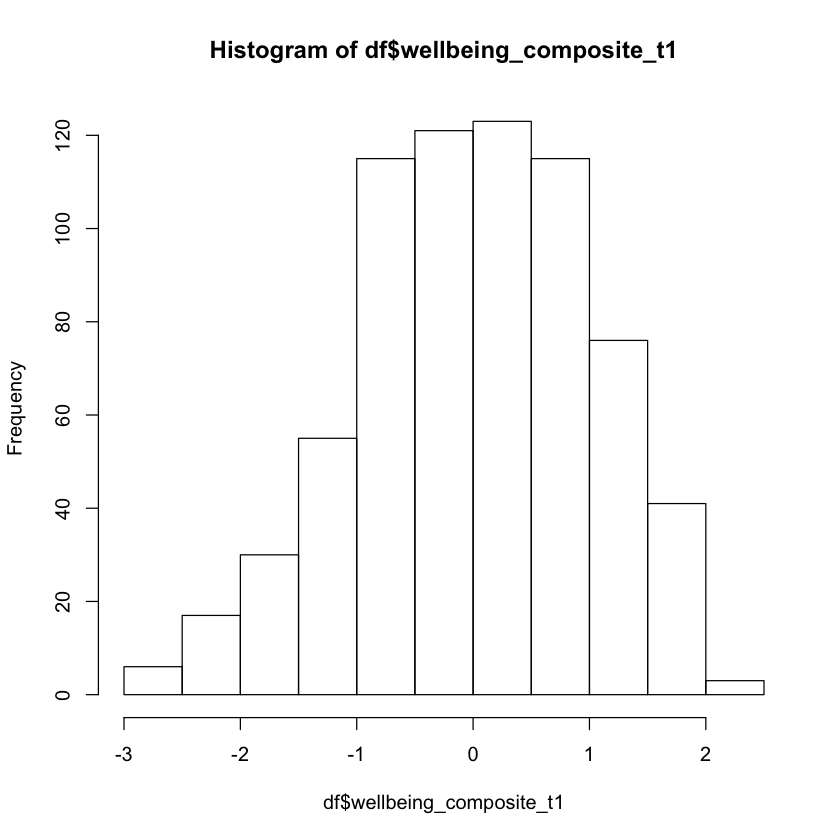

In [45]:
hist(df$wellbeing_composite_t1)

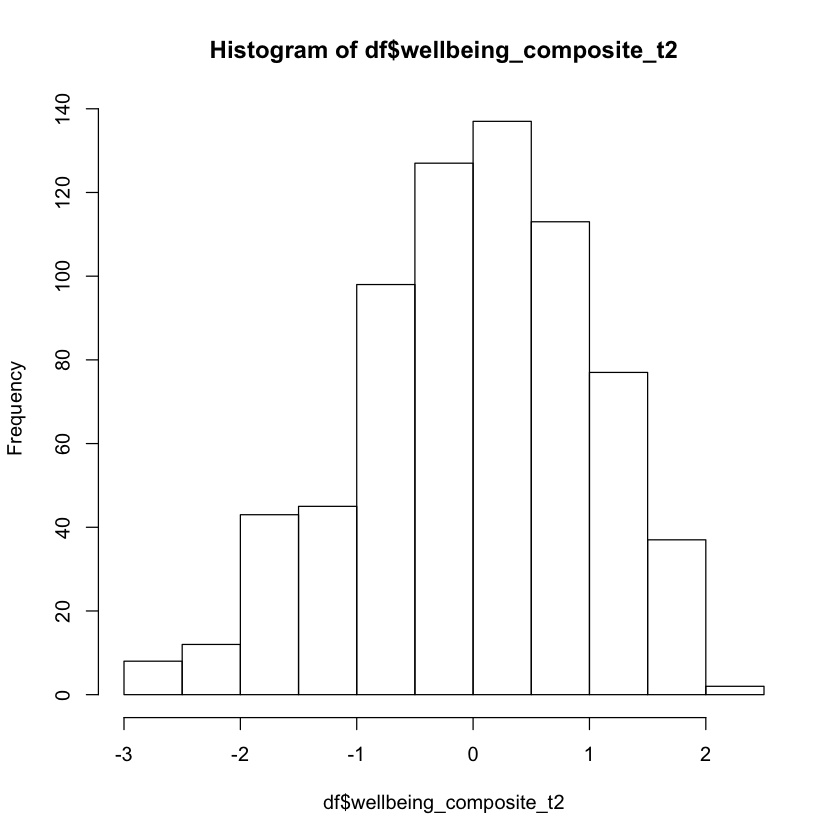

In [46]:
hist(df$wellbeing_composite_t2)

## Load nominations and compute network in/out degree for each P and each network

In [47]:
nominations = read.csv(paste(DATA_DIR, 'Network_Survey/network_df.csv', sep=""), na.strings=c("", " ", "NA", "#N/A"))
# Drop first column (which is just a row number)
nominations = nominations[,2:length(nominations)]
dim(nominations)
str(nominations)
head(nominations)

[1] 33676     4

'data.frame':	33676 obs. of  4 variables:
 $ PID         : int  1001 1004 1006 1014 1017 1047 1061 1065 1078 1080 ...
 $ DID         : int  30 35 21 70 73 76 24 75 32 30 ...
 $ Nominations : int  4966 7123 5092 4963 7475 3123 2992 3946 3315 6207 ...
 $ Network_Type: Factor w/ 10 levels "CloseFrds","EmpSupp",..: 1 1 1 1 1 1 1 1 1 1 ...


,PID,DID,Nominations,Network_Type
,<int>,<int>,<int>,<fct>
1,1001,30,4966,CloseFrds
2,1004,35,7123,CloseFrds
3,1006,21,5092,CloseFrds
4,1014,70,4963,CloseFrds
5,1017,73,7475,CloseFrds
6,1047,76,3123,CloseFrds


### Sanity check for missing values - we aren't using the DID (dorm) column so that's fine

In [48]:
colSums(is.na(nominations))

PID          DID  Nominations Network_Type 
           0           15            0            0

### Make a function to compute in/out degrees for any given set of nominations

In [49]:
add_network_columns = function(df, df_nominations, suffix) {
    # Filter for unique person-nominee pairs for this network
    # (since, if df_nominations includes multiple networks,
    #  person A may nominate person B more than once)
    df_nominations = df_nominations %>% group_by(PID, Nominations) %>% filter(row_number() == 1)

    # Add a column for the empathy of the nominee
    emp_frame = df[c('PID', 'empathy')]
    df_nominations = merge(df_nominations, emp_frame, by.x='Nominations', by.y='PID', all.x=FALSE, all.y=FALSE)
    
    s = tapply(df_nominations$PID, df_nominations$Nominations, length)
    s = as.data.frame(s)
    in_colname = paste('degree_in', suffix, sep='_')
    colnames(s) = in_colname
    df = merge(df, s, by.x="PID", by.y="row.names", all.x=TRUE, all.y=FALSE)
#     df = column_to_rownames(df, "Row.names")
    
    s = tapply(df_nominations$Nominations, df_nominations$PID, length)
    s = as.data.frame(s)
    out_colname = paste('degree_out', suffix, sep='_')
    colnames(s) = out_colname
    df = merge(df, s, by.x="PID", by.y="row.names", all.x=TRUE, all.y=FALSE)
#     df = column_to_rownames(df, "Row.names")

    df[[in_colname]] = df[[in_colname]] %>% replace_na(0)
    df[[out_colname]] = df[[out_colname]] %>% replace_na(0)

    s = tapply(df_nominations$empathy, df_nominations$PID, mean)
    s = as.data.frame(s)
    out_colname = paste('empathy', suffix, sep='_')
    colnames(s) = out_colname
    df = merge(df, s, by.x="PID", by.y="row.names", all.x=TRUE, all.y=FALSE)
#     df = column_to_rownames(df, "Row.names")
    
    return(df)
}

### Compute the union network

In [50]:
tmp = nominations %>% filter(Network_Type != "Liked" & Network_Type != "NegAff")
df = add_network_columns(df, tmp, "UNION")
head(df)

,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_C,BFI_N,BFI_O,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest,wellbeing_composite_t1,wellbeing_composite_t2,degree_in_UNION,degree_out_UNION,empathy_UNION
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,5.5,3.5,6.5,0,70000,6.166667,2.000000,1.5,5,-0.05862651,0.83993983,3,0,NA
2,1004,female,south_asian,Donner,2.833333,6.000,2.000000,2.0,4.0,5.5,4.5,3.0,5.5,1,10000,3.000000,2.666667,3.0,1,-0.98138408,-1.95722956,7,6,5.479167
3,1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,7.0,3.0,6.5,0,210000,5.166667,2.000000,3.0,5,-0.44690440,-0.66253028,6,4,6.437500
4,1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,6.5,1.5,6.5,0,130000,5.500000,2.333333,3.0,6,0.61446613,-0.79801599,1,0,NA
5,1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,5.5,1.5,4.5,0,90000,5.833333,2.000000,2.5,6,0.22618824,-0.04126834,6,4,5.812500
6,1105,female,white,Larkin,6.666667,5.750,2.000000,2.0,4.5,5.0,5.0,2.0,4.5,0,170000,6.666667,2.000000,2.0,4,0.48041399,0.64021289,6,9,5.847222


#### Spot check the first P

In [51]:
nominations[nominations$Nominations == 1001,]

,PID,DID,Nominations,Network_Type
,<int>,<int>,<int>,<fct>
519,4440,30,1001,CloseFrds
11280,7718,30,1001,PosEmoSupp
11767,5395,30,1001,PosEmoSupp
19900,4440,30,1001,PosAff
24999,4440,30,1001,Gossip
29671,5395,30,1001,Liked
32602,4440,30,1001,StudyWith


### Compute the 'intimate' network (close friends and bad news)

In [52]:
tmp = nominations %>% filter(Network_Type == "CloseFrds" | Network_Type == "NegEmoSupp" )
df = add_network_columns(df, tmp, "INTIMATE")
head(df)

,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_C,BFI_N,BFI_O,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest,wellbeing_composite_t1,wellbeing_composite_t2,degree_in_UNION,degree_out_UNION,empathy_UNION,degree_in_INTIMATE,degree_out_INTIMATE,empathy_INTIMATE
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,5.5,3.5,6.5,0,70000,6.166667,2.000000,1.5,5,-0.05862651,0.83993983,3,0,NA,1,0,NA
2,1004,female,south_asian,Donner,2.833333,6.000,2.000000,2.0,4.0,5.5,4.5,3.0,5.5,1,10000,3.000000,2.666667,3.0,1,-0.98138408,-1.95722956,7,6,5.479167,5,4,5.6250
3,1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,7.0,3.0,6.5,0,210000,5.166667,2.000000,3.0,5,-0.44690440,-0.66253028,6,4,6.437500,4,4,6.4375
4,1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,6.5,1.5,6.5,0,130000,5.500000,2.333333,3.0,6,0.61446613,-0.79801599,1,0,NA,1,0,NA
5,1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,5.5,1.5,4.5,0,90000,5.833333,2.000000,2.5,6,0.22618824,-0.04126834,6,4,5.812500,3,1,5.6250
6,1105,female,white,Larkin,6.666667,5.750,2.000000,2.0,4.5,5.0,5.0,2.0,4.5,0,170000,6.666667,2.000000,2.0,4,0.48041399,0.64021289,6,9,5.847222,4,5,6.0250


#### Spot check the first P

In [53]:
tmp[tmp$Nominations == 1001,]

,PID,DID,Nominations,Network_Type
,<int>,<int>,<int>,<fct>
519,4440,30,1001,CloseFrds


### Compute all other networks individually, in case we want to use them in a subsequent analysis

In [54]:
for (nt in unique(nominations$Network_Type)) {
    print(nt)
    tmp = nominations %>% filter(Network_Type == nt)
    df = add_network_columns(df, tmp, nt)
}
head(df)

[1] "CloseFrds"
[1] "NegEmoSupp"
[1] "PosEmoSupp"
[1] "Responsive"
[1] "EmpSupp"
[1] "PosAff"
[1] "NegAff"
[1] "Gossip"
[1] "Liked"
[1] "StudyWith"


,PID,gender,race,dorm,life_satisfaction_t1,empathy,loneliness_t1,stress_t1,BFI_E,BFI_A,BFI_C,BFI_N,BFI_O,intl_student,family_income,life_satisfaction_t2,loneliness_t2,stress_t2,parent_education_highest,wellbeing_composite_t1,wellbeing_composite_t2,degree_in_UNION,degree_out_UNION,empathy_UNION,degree_in_INTIMATE,degree_out_INTIMATE,empathy_INTIMATE,degree_in_CloseFrds,degree_out_CloseFrds,empathy_CloseFrds,degree_in_NegEmoSupp,degree_out_NegEmoSupp,empathy_NegEmoSupp,degree_in_PosEmoSupp,degree_out_PosEmoSupp,empathy_PosEmoSupp,degree_in_Responsive,degree_out_Responsive,empathy_Responsive,degree_in_EmpSupp,degree_out_EmpSupp,empathy_EmpSupp,degree_in_PosAff,degree_out_PosAff,empathy_PosAff,degree_in_NegAff,degree_out_NegAff,empathy_NegAff,degree_in_Gossip,degree_out_Gossip,empathy_Gossip,degree_in_Liked,degree_out_Liked,empathy_Liked,degree_in_StudyWith,degree_out_StudyWith,empathy_StudyWith
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,male,south_asian,Rinconada,4.833333,6.375,1.333333,2.5,6.5,6.0,5.5,3.5,6.5,0,70000,6.166667,2.000000,1.5,5,-0.05862651,0.83993983,3,0,NA,1,0,NA,1,0,NA,0,0,NA,2,0,NA,0,0,NA,0,0,NA,1,0,NA,0,0,NA,1,0,NA,1,0,NA,1,0,NA
2,1004,female,south_asian,Donner,2.833333,6.000,2.000000,2.0,4.0,5.5,4.5,3.0,5.5,1,10000,3.000000,2.666667,3.0,1,-0.98138408,-1.95722956,7,6,5.479167,5,4,5.6250,4,4,5.6250,5,1,4.750000,4,4,5.4375,2,2,5.5000,3,1,4.7500,2,1,4.7500,1,0,NA,1,1,4.750000,1,1,4.750,3,2,5.5625
3,1047,female,other_or_mixed,Twain,5.333333,6.500,2.000000,2.5,5.5,6.5,7.0,3.0,6.5,0,210000,5.166667,2.000000,3.0,5,-0.44690440,-0.66253028,6,4,6.437500,4,4,6.4375,4,4,6.4375,4,3,6.541667,3,4,6.4375,2,2,6.5625,1,2,6.5625,3,4,6.4375,1,1,6.5,4,3,6.541667,1,2,6.000,2,1,6.6250
4,1078,female,east_asian,Loro,5.500000,6.250,1.333333,2.0,4.5,6.5,6.5,1.5,6.5,0,130000,5.500000,2.333333,3.0,6,0.61446613,-0.79801599,1,0,NA,1,0,NA,1,0,NA,0,0,NA,1,0,NA,1,0,NA,0,0,NA,0,0,NA,0,1,5.0,0,0,NA,0,0,NA,0,0,NA
5,1097,male,east_asian,Otero,6.000000,5.000,2.000000,2.0,3.0,4.0,5.5,1.5,4.5,0,90000,5.833333,2.000000,2.5,6,0.22618824,-0.04126834,6,4,5.812500,3,1,5.6250,2,1,5.6250,1,1,5.625000,1,1,6.6250,0,1,5.6250,0,1,4.8750,1,1,6.1250,0,0,NA,0,1,5.625000,0,1,6.000,3,1,6.6250
6,1105,female,white,Larkin,6.666667,5.750,2.000000,2.0,4.5,5.0,5.0,2.0,4.5,0,170000,6.666667,2.000000,2.0,4,0.48041399,0.64021289,6,9,5.847222,4,5,6.0250,3,4,5.8125,2,3,6.125000,2,2,5.3750,2,2,6.3125,1,4,6.1875,2,1,6.8750,1,0,NA,2,3,5.750000,1,1,5.125,4,2,6.1875


### A look at in and out degree distributions, to be sure they seem sane

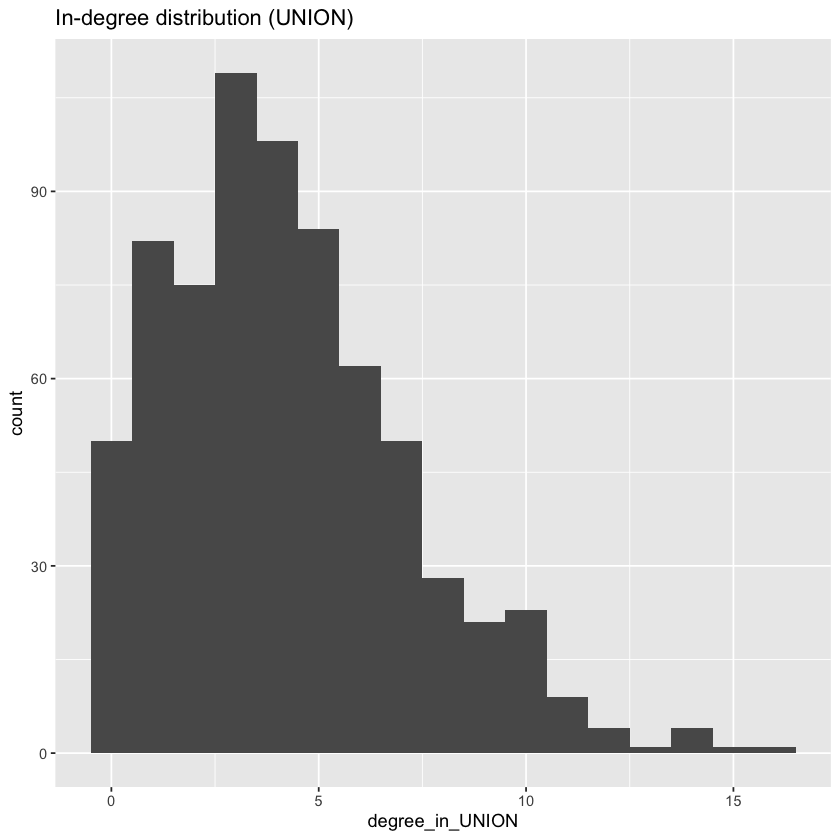

In [55]:
ggplot(df) +
  geom_histogram(aes(x=degree_in_UNION), binwidth=1) +
  ggtitle("In-degree distribution (UNION)")

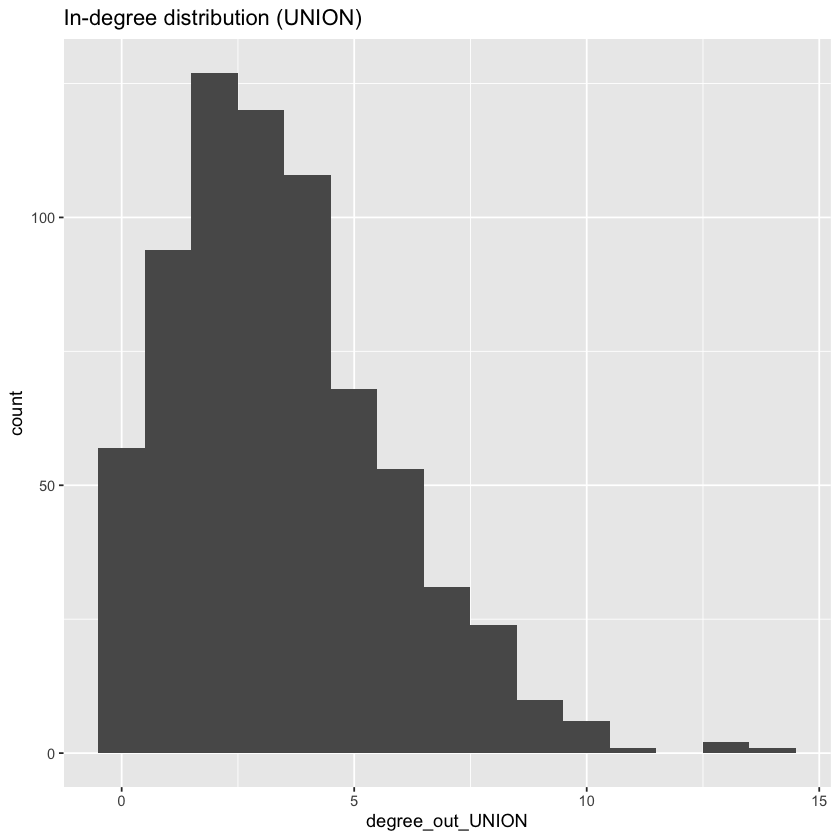

In [56]:
ggplot(df) +
  geom_histogram(aes(x=degree_out_UNION), binwidth=1) +
  ggtitle("In-degree distribution (UNION)")

## Train-test split and write

In [57]:
dorm_counts = sort(table(df$dorm), decreasing=TRUE)
dorm_counts


         Larkin           Roble            Soto         FroSoCo         Burbank 
             55              49              47              42              39 
          Twain           Otero          Donner        Junipero           Cedro 
             39              37              36              33              31 
         Arroyo       Rinconada           Meier      Sally Ride         Alondra 
             30              30              28              26              24 
      Norcliffe          Ujamaa        Cardenal          Faisan           Okada 
             24              21              20              16              15 
           Loro       Eucalipto         Granada          Zapata         Gavilan 
             13              12              11               9               8 
Muwekma-Tah-Ruk            #N/A      664 Lomita 
              7               0               0 

In [58]:
train_dorms = row.names(dorm_counts[c(TRUE, TRUE, FALSE, TRUE, TRUE)])
train_dorms

[1] "Larkin"          "Roble"           "FroSoCo"         "Burbank"        
 [5] "Twain"           "Otero"           "Junipero"        "Cedro"          
 [9] "Arroyo"          "Rinconada"       "Sally Ride"      "Alondra"        
[13] "Norcliffe"       "Ujamaa"          "Faisan"          "Okada"          
[17] "Loro"            "Eucalipto"       "Zapata"          "Gavilan"        
[21] "Muwekma-Tah-Ruk" "#N/A"

In [59]:
test_dorms = row.names(dorm_counts[c(FALSE, FALSE, TRUE, FALSE, FALSE)])
test_dorms

[1] "Soto"       "Donner"     "Meier"      "Cardenal"   "Granada"   
[6] "664 Lomita"

In [60]:
df_train = df %>% filter(dorm %in% train_dorms)
df_test = df %>% filter(dorm %in% test_dorms)

write.csv(df_train, paste(DATA_DIR, 'postprocessed/df_Rcleaned_train.csv', sep=''))
write.csv(df_test, paste(DATA_DIR, 'postprocessed/df_Rcleaned_test.csv', sep=''))